In [1]:
library(quanteda)
library(readtext)
library(tidyverse)
library(topicmodels)
library(stringi)
library(tidytext)
library(rio)

Package version: 1.5.1
Parallel computing: 2 of 32 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rio’

The following object is masked from ‘package:quanteda’:

    convert



The goal of this analyses:

- We will analyse three guidelines statements  in this paper to assess how these guidelines have addressed the different concerns we have raised. These are guidelines on telehealth ethics for the United States framed by the American Medical Association, the South African statement, and the world medical association statements. 

In [34]:
# paper on the US AMA guidelines
chaet <- texts(readtext("text_data/chaet.pdf"))

In [45]:
summary(chaet)

   Length     Class      Mode 
        1 character character 

In [35]:
# paper on the South African guidelines

proteas <- texts(readtext("text_data/south_africa.pdf"))

In [36]:
summary(proteas)

   Length     Class      Mode 
        1 character character 

In [37]:
# World medical association guidelines

wma <- texts(readtext("text_data/wma.html"))

In [38]:
summary(wma)

   Length     Class      Mode 
        1 character character 

In [39]:
# identify the beginning of the text corpus of the guidelines for South Africa

start_v <- stri_locate_first_fixed(proteas, "INTRODUCTION")

In [40]:
start_v

start,end
3106,3117


In [41]:
stri_sub(proteas, 1, 100) # first 100 characters in South African guidelines


[1] " HEALTH PROFESSIONS COUNCIL OF SOUTH AFRICA\n               GUIDELINES FOR GOOD PRACTICE\n            "

In [42]:
end_v <- stri_locate_last_fixed(proteas, "5. SOURCES CONSULTED" )

In [15]:
end_v

start,end
28209,28228


In [43]:
proteas_text <- stri_sub(proteas, start_v[1], end_v[1])

In [44]:
proteas_text

[1] "INTRODUCTION\n1.1 The objective of the South African Telemedicine System as established by the\n    National Department of Health is to deliver healthcare services at a distance to\n    South African communities in under-served areas. The system has been established\n    to alleviate the human resource crisis as experienced and is geared to improve the\n    links and communication between developed healthcare facilities and the\n    underdeveloped rural areas. Different categories of Health Care Practitioners will be\n    involved.\n1.2 The Health Professions Council of South Africa (HPCSA) has a mandate to regulate\n    healthcare provision by ensuring that services are provided by qualified and skilled\n    healthcare practitioners. This regulatory mandate applies to healthcare practitioner\n    in both state and privately-owned health care institutions. It is the mandate of the\n    HPCSA to protect the “patient” against possible abuse by healthcare practitioner on\n    one hand and to provide guidance for good practice to the professions.\n1.3 All Telemedicine services should involve a healthcare provider where there is an\n    actual face-to-face consultation and physical examination of the patient in a clinical\n    setting. The consulting practitioner will communicate the information to the servicing\n    practitioner, who will then provide the necessary assistance.\nNote: These guidelines must be read as a whole and not piece-meal as the overall\npurpose may be lost. The guidelines must further be read in conjunction with\nother ethical booklets of the HPCSA which include but are not limited to:\n        Booklet No 1: General ethical guidelines for healthcare professions\n        Booklet No 9: Seeking patients’ informed consent\n        Booklet No 10: Confidentiality\n                                               5\n\n2. PURPOSE\nThe purpose of these guidelines is twofold:\n       (a) Firstly to provide an ethical framework that draws from the core values and\n       standards in Booklet No 1 and pertinent laws.\n       (b) Secondly, to provide guidelines to Healthcare Practitioners engaged in\n       telemedicine practices within and outside the South Africa.\n3. DEFINITION OF CONCEPTS\nThese guidelines first provide definitions of telemedicine and other related terminology\nas used in the guidelines.\n3.1 Telemedicine\nFor the purposes of these guidelines, “telemedicine” is defined as:\n       The practice of medicine using electronic communications, information\n       technology or other electronic means between a healthcare practitioner in one\n       location and a healthcare practitioner in another location for the purpose of\n       facilitating, improving and enhancing clinical, educational and scientific\n       healthcare and research, particularly to the under serviced areas in the Republic\n       of South Africa.\nNote:\n 1. Telemedicine involves secure videoconferencing or similar forms of technology\n     which enable healthcare practitioners to replicate the interaction of traditional face-\n     to-face consultations between healthcare practitioners and the patient.\n                                              6\n\n  2. Telemedicine as defined refers to where information is exchanged electronically\n     either on or off-line, formally, informally or as a need for a second opinion.\n3.2 Health establishment\n“Health establishment” means the whole or part of a public or private institution, facility,\nbuilding or place, whether for profit or not, that is designed to provide inpatient or\noutpatient treatment, and diagnostic or therapeutic interventions\n3.3 Healthcare practitioner\n“Healthcare practitioner” means a person providing health services, registered in terms\nof the Health Professions Act No 56 of 1974, to include any other appropriate disciplines\nas defined in the National Health Act No 61 of 2003.\n3.4 The consulting healthcare practitioner\nThe “consulting healthcare practitioner”

In [46]:
chaet_begins <- stri_locate_first_fixed(chaet, 'REVIEW')

In [47]:
chaet_begins

start,end
121,126


In [56]:
chaet_ends <- stri_locate_last_fixed(chaet, "Acknowledgements" )

In [57]:
chaet_ends

start,end
27027,27042


In [58]:
chaet_text <- stri_sub(chaet, chaet_begins[1], chaet_ends[1])

In [59]:
chaet_text

[1] "REVIEW\nEthical practice in Telehealth and Telemedicine\nDanielle Chaet, MSB1, Ron Clearfield, MD, FACR2, James E. Sabin, MD3,4, and Kathryn Skimming,\nMD, MA5on behalf of the Council on Ethical and Judicial Affairs American Medical Association\n1\n American Medical Association, Chicago, IL, USA; 2, Bonita Springs, FL, USA; 3Harvard Pilgrim Health Care, Wellesley, MA, USA; 4Harvard Medical\nSchool, Boston, MA, USA; 5University of Maryland/Sheppard Pratt Psychiatry Residency Program, Baltimore, MD, USA.\nThis article summarizes the report of the American Medical                      Prior to recent innovations in information technology,\nAssociation’s (AMA) Council on Ethical and Judicial Affairs                  individuals who had a medical concern turned to hardcopy\n(CEJA) on ethical practice in telehealth and telemedicine.                   publications, spoke with family or friends, or made an\nThrough its reports and recommendations, CEJA is re-\n                                                                             appointment to see their physician. Now, a growing num-\nsponsible for maintaining and updating the AMA Code of\nMedical Ethics (Code). CEJA reports are developed through\n                                                                             ber of these individuals are seeking answers online and\nan iterative process of deliberation with input from multiple                can obtain them at virtually any time from virtually any-\nstakeholders; report recommendations, once adopted by                        where.1 Evolving technologies also allow patients to re-\nthe AMA House of Delegates, become ethics policy of the                      ceive care remotely through telemedicine applications,\nAMA and are issued as Opinions in the Code. To provide                       which offer opportunities for patients who are home-\nenduring guidance for the medical profession as a whole,                     bound, who live in rural or underserved areas, or who\nCEJA strives to articulate expectations for conduct that are                 face other impediments that limit their access to care.\nas independent of specific technologies or models of practice\nas possible. The present report, developed at the request of\n                                                                             Likewise, new technologies make it possible for patients\nthe House of Delegates, provides broad guidance for ethical                  who have rare medical disorders to obtain care from\nconduct relating to key issues in telehealth/telemedicine.                   distant specialists.2–4 Even patients who have access to\nThe report and recommendations were debated at meetings                      care in person may find telemedicine a welcome\nof the House in June and November 2015; recommenda-                          convenience.5\ntions were adopted in June 2016 and published as Opinion                        While such innovations have significant potential to benefit\nE-1.2.12, Ethical Practice in Telemedicine, in November                      patients, they also raise ethical challenges. In particular, con-\n2016. A summary of the key points of the recommendations\n                                                                             cerns have been raised that exchanging health information and\ncan be found in Appendix A (online), and the full text of the\nopinion can be found in Appendix B (online).                                 providing care electronically could create new risks to quality,\n                                                                             safety, and continuity of care, all of which could weaken\nKEY WORDS: ethics; policy; telemedicine; professionalism; AMA (American      patient-physician relationships.4,6–9\nMedical Association).\nJ Gen Intern Med 32(10):1136–40\nDOI: 10.1007/s11606-017-4082-2                                                   TELEHEALTH AND TELEMEDI

In [60]:
wma_begins <- stri_locate_first_fixed(wma, 'DEFINITION')

In [62]:
wma_begins

start,end
2035,2044


In [63]:
wma_ends <- stri_locate_last_fixed(wma, 'Policy Types')

In [64]:
wma_ends

start,end
9647,9658


In [65]:
wma_text <- stri_sub(wma, wma_begins[1], wma_ends[1])

In [66]:
wma_text

[1] "DEFINITION\nTelemedicine is the practice of medicine over a distance, in which interventions, diagnoses, therapeutic decisions, and subsequent treatment recommendations are based on patient data, documents and other information transmitted through telecommunication systems.\nTelemedicine can take place between a physician and a patient or between two or more physicians including other healthcare professionals.\nPREAMBLE\nThe development and implementation of information and communication technology are creating new and different ways for of practicing medicine. Telemedicine is used for patients who cannot see an appropriate physician timeously because of inaccessibility due to distance, physical disability, employment, family commitments (including caring for others), patients’ cost and physician schedules. It has capacity to reach patients with limited access to medical assistance and have potential to improve health care.\nFace-to-face consultation between physician and patient remains the gold standard of clinical care.\nThe delivery of telemedicine services must be consistent with in-person services and supported by evidence.\nThe principles of medical ethics that are mandatory for the profession must also be respected in the practice of telemedicine.\nPRINCIPLES\nPhysicians must respect the following ethical guidelines when practicing telemedicine:\n1. The patient-physician relationship should be based on a personal examination and sufficient knowledge of the patient’s medical history. Telemedicine should be employed primarily in situations in which a physician cannot be physically present within a safe and acceptable time period. It could also be used in management of chronic conditions or follow-up after initial treatment where it has been proven to be safe and effective.\n2. The patient-physician relationship must be based on mutual trust and respect. It is therefore essential that the physician and patient be able to identify each other reliably when telemedicine is employed. In case of consultation between two or more professionals within or between different jurisdictions, the primary physician remains responsible for the care and coordination of the patient with the distant medical team.\n3. The physician must aim to ensure that patient confidentiality, privacy and data integrity are not compromised. Data obtained during a telemedicine consultation must be secured to prevent unauthorized access and breaches of identifiable patient information through appropriate and up to date security measures in accordance with local legislation. Electronic transmission of information must also be safeguarded against unauthorized access.\n4. Proper informed consent requires that all necessary information regarding the distinctive features of telemedicine visit be explained fully to patients including, but not limited to:\nexplaining how telemedicine works,\nhow to schedule appointments,\nprivacy concerns,\nthe possibility of technological failure including confidentiality breaches,\nprotocols for contact during virtual visits,\nprescribing policies and coordinating care with other health professionals in a clear and understandable manner, without influencing the patient’s choices.\n5. Physicians must be aware that certain telemedicine technologies could be unaffordable to patients and hence impede access. Inequitable access to telemedicine can further widen the health outcomes gap between the poor and the rich.\nAutonomy and privacy of the Physician\n6. A physician should not to participate in telemedicine if it violates the legal or ethical framework of the country.\n7. Telemedicine can potentially infringe on the physician privacy due to 24/7 virtual availability. The physician needs to inform patients about availability and recommend services such as emergency when inaccessible.\n8. The physician should exercise their professional autonomy in deciding whether a telemedicine versus face-to-face consultation is appropriate.

In [68]:
all_text <- corpus(proteas_text) + corpus(chaet_text) + corpus(wma_text)

In [77]:
all_tokens <- tokens(all_text,
      remove_punct = T,
      remove_numbers = T)

In [72]:
all_dfm <- dfm(all_text,
              remove_punct = T,
              remove = stopwords('en'),
              remove_numbers = T)

In [160]:
frqs <- textstat_frequency(all_dfm, 20)

Saving 6.67 x 6.67 in image


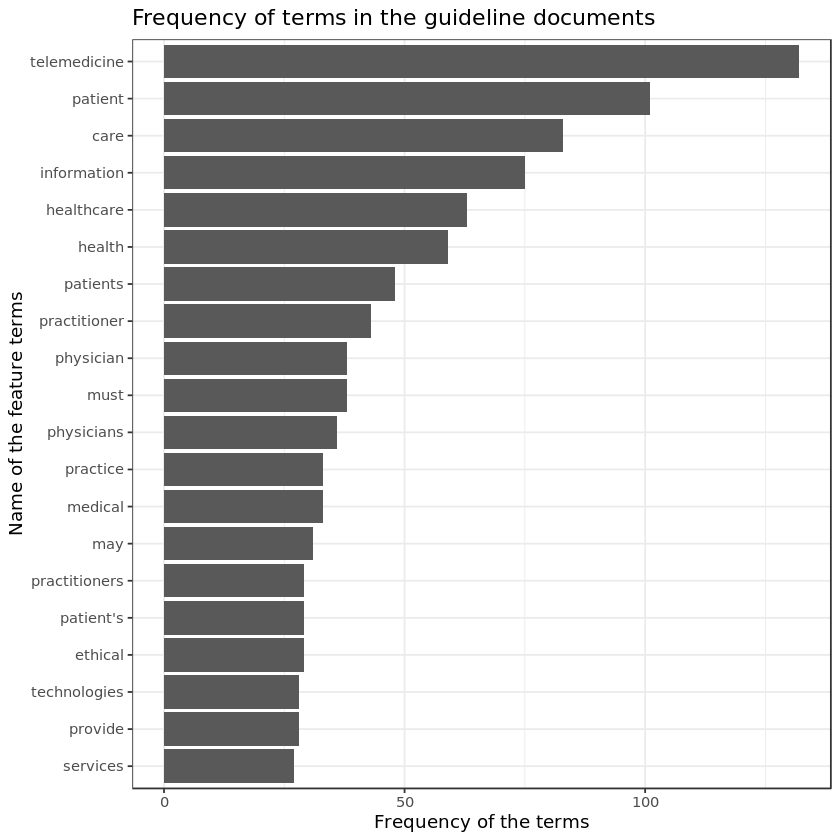

In [165]:
ggplot(frqs, aes(x = reorder(feature, -rank), y = frequency)) +
 geom_bar(stat = "identity") +
 coord_flip() +
 labs(title = "Frequency of terms in the guideline documents",
     x = "Name of the feature terms",
     y = "Frequency of the terms") +
 theme_bw() +
 ggsave("term_freq.png")

In [79]:
kwic(all_tokens, pattern = "patient-physician")

docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
text11,451,451,policy telemedicine professionalism AMA American,patient-physician,relationships Medical Association J Gen,patient-physician
text11,683,683,modes of Received December care,patient-physician,interactions give rise to differing,patient-physician
text11,850,850,potential for disruption of the,patient-physician,tion they find on the,patient-physician
text11,1167,1167,not establish a legally recognized,patient-physician,rela Telemedicine will not be,patient-physician
text11,1904,1904,and they do in in-person,patient-physician,interactions other health care professionals,patient-physician
text12,185,185,guidelines when practicing telemedicine The,patient-physician,relationship should be based on,patient-physician
text12,250,250,be safe and effective The,patient-physician,relationship must be based on,patient-physician
text12,960,960,of telemedicine while protecting the,patient-physician,relationship confidentiality and quality of,patient-physician


In [91]:
# what proportion of data security, and patient-physician OR patient-doctor Or doctor-patient
weighted_pct <- dfm_weight(all_dfm, scheme = "prop") * 100

data_related <- dfm_select(weighted_pct, pattern = "data*")
patient_related <- dfm_select(weighted_pct, pattern = "patient*")
confidentiality <- dfm_select(weighted_pct, pattern = "confiden*")


In [86]:
data_related

Document-feature matrix of: 3 documents, 1 feature (0.0% sparse).
3 x 1 sparse Matrix of class "dfm"
        features
docs          data
  text1  0.4357298
  text11 0.1113586
  text12 0.4878049

In [90]:
patient_related %>% as_tibble()

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”

document,patient,patients,patient's,patient-practitioner,patient-initiated,patient-related,patient-practitioners,patient-physician,patient-centered,patient-doctor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
text1,3.594771,0.5991285,1.0893246,0.05446623,0.05446623,0.05446623,0.05446623,0.0000000,0.00000000,0.0000000
text11,1.169265,1.5590200,0.3340757,0.00000000,0.00000000,0.00000000,0.00000000,0.2783964,0.05567929,0.0000000
text12,2.276423,1.4634146,0.4878049,0.00000000,0.00000000,0.00000000,0.00000000,0.4878049,0.00000000,0.1626016


In [92]:
confidentiality

Document-feature matrix of: 3 documents, 3 features (44.4% sparse).
3 x 3 sparse Matrix of class "dfm"
        features
docs     confidentiality  confident confidential
  text1        0.7080610 0            0         
  text11       0.3340757 0.05567929   0.05567929
  text12       0.4878049 0            0         

In [94]:
docnames(all_dfm) <- c("South Africa", "AMA", "WMA")

In [95]:
docnames(all_dfm)

[1] "South Africa" "AMA"          "WMA"

In [139]:
data_pt_conf <- all_dfm %>%
  dfm_keep(pattern = c('data*', 'patient-physician', 'confidentiality*', 
                       'patient-practitioner')) 

In [97]:
all_dfm

Document-feature matrix of: 3 documents, 1,402 features (57.3% sparse).

In [ ]:
??convert


In [140]:
dpc_df <- data_pt_conf %>% as_tibble()
 

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”

In [141]:
three <- gather(dpc_df, 'terms', 'count', -document)

Saving 6.67 x 6.67 in image


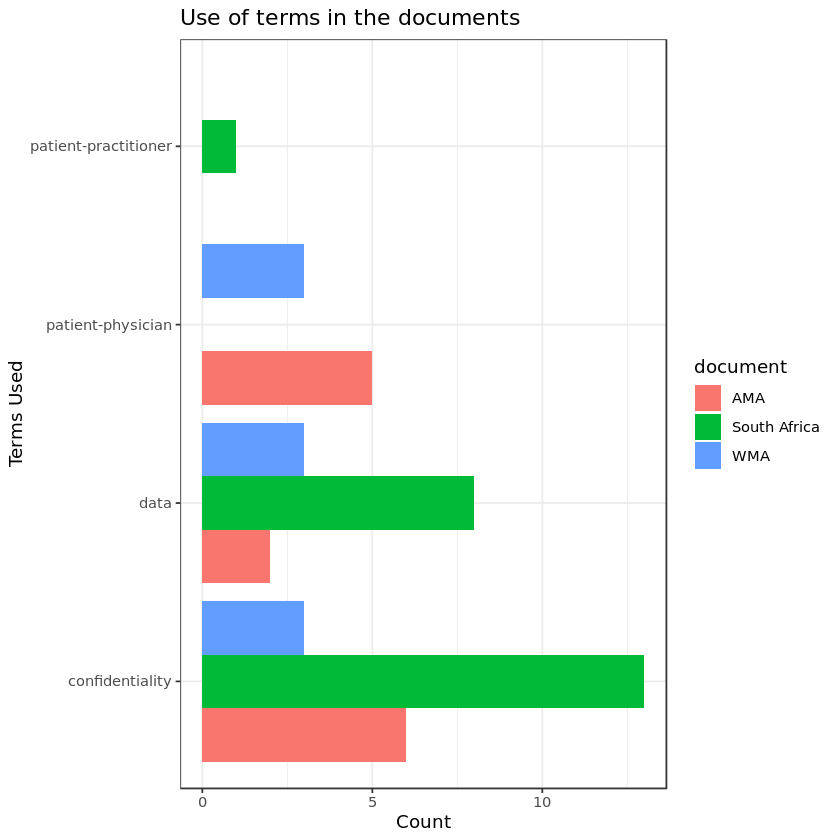

In [144]:
ggplot(three, aes(x = terms, y = count, fill = document)) +
 geom_bar(stat = "identity", position = position_dodge()) +
 coord_flip() +
 theme_bw() +
 labs(title = "Use of terms in the documents",
     y = "Count",
     x = "Terms Used") +
  ggsave("terms_by_system.png")

In [145]:
lda_fiting_10 <- convert(all_dfm, to = 'topicmodels')

ERROR: Error in convert(all_dfm, to = "topicmodels"): unused argument (to = "topicmodels")


In [146]:
summary(all_dfm)

Length  Class   Mode 
  4206    dfm     S4 

In [148]:
ld_topic_10 <- quanteda::convert(all_dfm, to = "topicmodels")

In [155]:
ld_10 <- LDA(ld_topic_10, k = 5)

In [156]:
get_terms(ld_10, 5)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
telemedicine,telemedicine,appropriate,patient,care
physician,patient,physician,healthcare,telemedicine
must,healthcare,care,telemedicine,health
patient,information,information,information,physicians
patients,b,patients,practitioner,telehealth
